[[Variables]]
    a1:  2.98622120 +/- 0.14867187 (4.98%) (init = 2.986237)
    a2: -4.33526327 +/- 0.11527506 (2.66%) (init = -4.335256)
    t1:  1.30994233 +/- 0.13121177 (10.02%) (init = 1.309932)
    t2:  11.8240351 +/- 0.46316470 (3.92%) (init = 11.82408)
[[Correlations]] (unreported correlations are < 0.500)
    C(a2, t2) =  0.987
    C(a2, t1) = -0.925
    C(t1, t2) = -0.881
    C(a1, t1) = -0.599
       95.45%    68.27%    _BEST_    68.27%    95.45%
 a1:  -0.27286  -0.14165   2.98622  +0.16353  +0.36343
 a2:  -0.30444  -0.13219  -4.33526  +0.10688  +0.19683
 t1:  -0.23392  -0.12494   1.30994  +0.14660  +0.32369
 t2:  -1.01943  -0.48820  11.82404  +0.46041  +0.90441


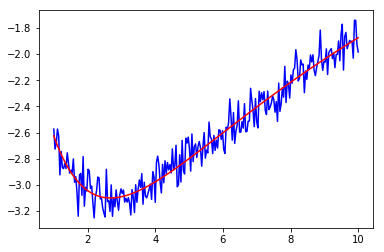

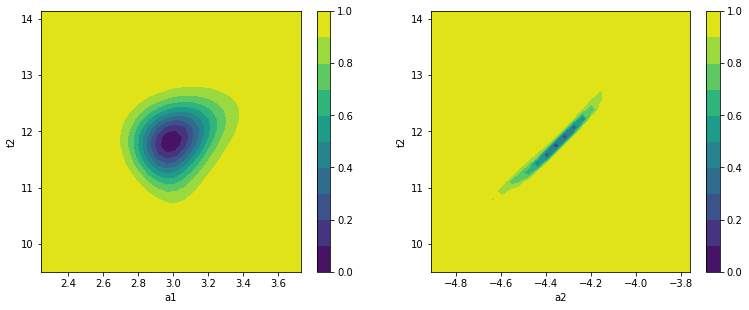

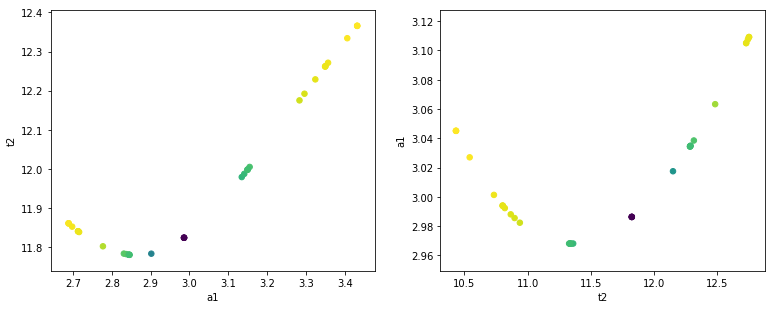

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import lmfit

x = np.linspace(1, 10, 250)
np.random.seed(0)
y = 3.0*np.exp(-x/2) - 5.0*np.exp(-(x-0.1)/10.) + 0.1*np.random.randn(x.size)

p = lmfit.Parameters()
p.add_many(('a1', 4.), ('a2', 4.), ('t1', 3.), ('t2', 3.))


def residual(p):
    return p['a1']*np.exp(-x/p['t1']) + p['a2']*np.exp(-(x-0.1)/p['t2']) - y


# create Minimizer
mini = lmfit.Minimizer(residual, p, nan_policy='propagate')

# first solve with Nelder-Mead algorithm
out1 = mini.minimize(method='Nelder')

# then solve with Levenberg-Marquardt using the
# Nelder-Mead solution as a starting point
out2 = mini.minimize(method='leastsq', params=out1.params)

lmfit.report_fit(out2.params, min_correl=0.5)

ci, trace = lmfit.conf_interval(mini, out2, sigmas=[1, 2], trace=True)
lmfit.printfuncs.report_ci(ci)

# plot data and best fit
plt.figure()
plt.plot(x, y, 'b')
plt.plot(x, residual(out2.params) + y, 'r-')

# plot confidence intervals (a1 vs t2 and a2 vs t2)
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
cx, cy, grid = lmfit.conf_interval2d(mini, out2, 'a1', 't2', 30, 30)
ctp = axes[0].contourf(cx, cy, grid, np.linspace(0, 1, 11))
fig.colorbar(ctp, ax=axes[0])
axes[0].set_xlabel('a1')
axes[0].set_ylabel('t2')

cx, cy, grid = lmfit.conf_interval2d(mini, out2, 'a2', 't2', 30, 30)
ctp = axes[1].contourf(cx, cy, grid, np.linspace(0, 1, 11))
fig.colorbar(ctp, ax=axes[1])
axes[1].set_xlabel('a2')
axes[1].set_ylabel('t2')

# plot dependence between two parameters
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
cx1, cy1, prob = trace['a1']['a1'], trace['a1']['t2'], trace['a1']['prob']
cx2, cy2, prob2 = trace['t2']['t2'], trace['t2']['a1'], trace['t2']['prob']

axes[0].scatter(cx1, cy1, c=prob, s=30)
axes[0].set_xlabel('a1')
axes[0].set_ylabel('t2')

axes[1].scatter(cx2, cy2, c=prob2, s=30)
axes[1].set_xlabel('t2')
axes[1].set_ylabel('a1')

plt.show()

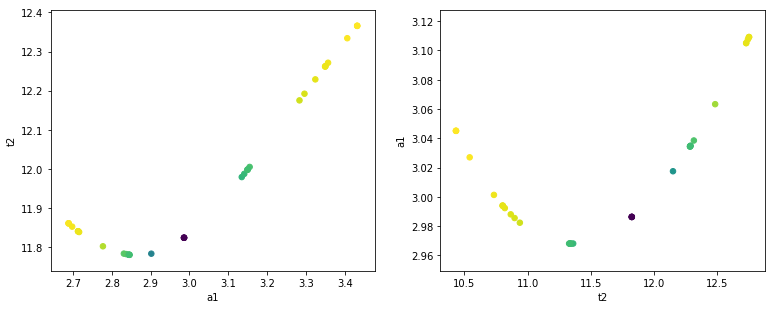

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
cx1, cy1, prob = trace['a1']['a1'], trace['a1']['t2'], trace['a1']['prob']
cx2, cy2, prob2 = trace['t2']['t2'], trace['t2']['a1'], trace['t2']['prob']

axes[0].scatter(cx1, cy1, c=prob, s=30)
axes[0].set_xlabel('a1')
axes[0].set_ylabel('t2')

axes[1].scatter(cx2, cy2, c=prob2, s=30)
axes[1].set_xlabel('t2')
axes[1].set_ylabel('a1')

plt.show()